In [1]:
import numpy as np
import glob
import tensorflow as tf
from tensorflow import keras
from PIL import Image

import matplotlib.pyplot as plt

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


In [2]:
idx2alph = {0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g',7:'h',8:'i',9:'j',10:'k',11:'l',12:'m',13:'n',14:'o',
            15:'p',16:'q',17:'r',18:'s',19:'t',20:'u',21:'v',22:'w',23:'x',24:'y',25:'z'}

alph2idx = {'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7,'i':8,'j':9,'k':10,'l':11,'m':12,'n':13,'o':14,
            'p':15,'q':16,'r':17,'s':18,'t':19,'u':20,'v':21,'w':22,'x':23,'y':24,'z':25}

In [11]:
images = []
labels = []

for filename in glob.glob('data2/*.png'):
    im = Image.open(filename)
    im = im.resize((64,64))
    img = np.asarray(im, dtype='float')
    img = img.reshape(64,64,1)
    images.append(img)
    
    lab = filename.split('/')[1]
    lab = lab.split('_')[0]
    idx = alph2idx[lab] 
    labels.append(idx)

In [12]:
images = np.array(images)
labels = np.array(labels)

In [13]:
print(labels.shape)
print(images.shape)

(1400,)
(1400, 64, 64, 1)


In [ ]:
import pickle

f1 = open('images','w')
f2 = open('labels','w')
pickle.dump(images,f1)
pickle.dump(labels,f2)
f1.close()
f2.close()

In [6]:
print(labels[:5])

[11 14  0 11 20]


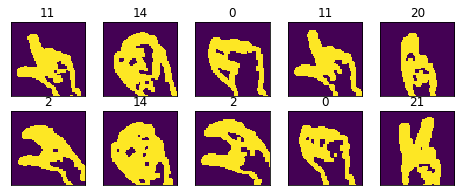

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,3))

for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    im = images[i]
    j = labels[i]
    ax.set_title(j)
    plt.imshow(im)
plt.show()

## Model Training

In [35]:
from keras.utils.np_utils import to_categorical
labels = to_categorical(labels, 26)
print (labels.shape)

(1555, 26)


In [19]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64,64,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 64)        640       
_________________________________________________________________
batch_normalization_5 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 128)       512       
__________

In [21]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(images)

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
H = model.fit_generator(
    datagen.flow(images, labels, batch_size=128),
    epochs = 50,
    verbose = 1,
    steps_per_epoch = 15
    )

Epoch 1/50
15/15 [==============================] - 260s 17s/step - loss: 7.7983 - acc: 0.0674
Epoch 2/50
15/15 [==============================] - 259s 17s/step - loss: 3.2310 - acc: 0.0821
Epoch 3/50
15/15 [==============================] - 257s 17s/step - loss: 2.8361 - acc: 0.1504
Epoch 4/50
15/15 [==============================] - 259s 17s/step - loss: 2.5629 - acc: 0.2075
Epoch 5/50
15/15 [==============================] - 257s 17s/step - loss: 2.3100 - acc: 0.2694
Epoch 6/50
15/15 [==============================] - 257s 17s/step - loss: 2.1809 - acc: 0.3064
Epoch 7/50
15/15 [==============================] - 258s 17s/step - loss: 1.9336 - acc: 0.3759
Epoch 8/50
15/15 [==============================] - 258s 17s/step - loss: 1.7483 - acc: 0.4320
Epoch 9/50
15/15 [==============================] - 257s 17s/step - loss: 1.6156 - acc: 0.4618
Epoch 10/50
15/15 [==============================] - 259s 17s/step - loss: 1.4682 - acc: 0.5164
Epoch 11/50
15/15 [==============================

In [25]:
model.save('sign_language_self.h5')

In [26]:
my_model = tf.keras.models.load_model('sign_language_self.h5')

In [27]:
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 64)        640       
_________________________________________________________________
batch_normalization_5 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 128)       512       
__________

In [28]:
from keras.models import load_model
model = load_model('sign_language_self.h5')

TypeError: tuple indices must be integers, not list